<a href="https://colab.research.google.com/github/SparkyGoLarky/SparkyGoLarky/blob/main/Build_stock_buy_and_hold_strategy_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.9.16


In [4]:
!sudo apt-get update -y
!sudo apt-get install python3.11
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.11 is already the newest version (3.11.2-1+focal1).
0 upgraded, 0 newly installed, 0 to remove 

In [10]:
import pandas as pd
data = pd.read_csv("msft_5y.csv", index_col=["Date"])
data.index = pd.to_datetime(data.index)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-02 00:00:00-05:00,88.182170,88.492938,86.166901,86.430580,47867800,0.0,0.0
2018-02-05 00:00:00-05:00,85.281698,87.805495,82.870911,82.870911,51031500,0.0,0.0
2018-02-06 00:00:00-05:00,81.825604,86.148079,80.281193,86.006821,67998600,0.0,0.0
2018-02-07 00:00:00-05:00,85.215768,86.421162,84.000956,84.387062,41107600,0.0,0.0
2018-02-08 00:00:00-05:00,84.481232,84.641322,79.819747,80.055176,55628700,0.0,0.0


In [11]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-26 00:00:00-05:00,243.649994,248.309998,242.000000,248.000000,33454500,0.0,0.0
2023-01-27 00:00:00-05:00,248.990005,249.830002,246.830002,248.160004,26480800,0.0,0.0
2023-01-30 00:00:00-05:00,244.509995,245.600006,242.199997,242.710007,25867400,0.0,0.0
2023-01-31 00:00:00-05:00,243.449997,247.949997,242.949997,247.809998,26525300,0.0,0.0
2023-02-01 00:00:00-05:00,248.000000,255.179993,245.470001,252.750000,29988688,0.0,0.0


In [12]:
data = data.asfreq("M")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-28 00:00:00-05:00,89.731759,90.554902,88.586932,88.719391,31167300.0,0.0,0.0
2018-03-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data = data.dropna()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-28 00:00:00-05:00,89.731759,90.554902,88.586932,88.719391,31167300.0,0.0,0.0
2018-11-30 00:00:00-05:00,106.052502,106.311171,104.768762,106.234528,33665600.0,0.0,0.0
2018-12-31 00:00:00-05:00,97.037550,98.100950,96.223237,97.305794,33173800.0,0.0,0.0
2019-01-31 00:00:00-05:00,99.442167,100.802550,98.848194,100.045715,55636400.0,0.0,0.0
2019-02-28 00:00:00-05:00,107.794642,108.602810,107.496391,107.785019,29083900.0,0.0,0.0


In [16]:
percent_change = data.pct_change()
percent_change.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-28 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-30 00:00:00-05:00,0.181884,0.173997,0.182666,0.197422,0.080158,NaN,NaN
2018-12-31 00:00:00-05:00,-0.085005,-0.077228,-0.081566,-0.084047,-0.014608,NaN,NaN
2019-01-31 00:00:00-05:00,0.024780,0.027539,0.027280,0.028158,0.677119,NaN,NaN
2019-02-28 00:00:00-05:00,0.083993,0.077382,0.087490,0.077358,-0.477251,NaN,NaN


In [17]:
percent_change = percent_change[["Open","High","Low","Close","Volume"]]
percent_change = percent_change.dropna()
percent_change.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-30 00:00:00-05:00,0.181884,0.173997,0.182666,0.197422,0.080158
2018-12-31 00:00:00-05:00,-0.085005,-0.077228,-0.081566,-0.084047,-0.014608
2019-01-31 00:00:00-05:00,0.024780,0.027539,0.027280,0.028158,0.677119
2019-02-28 00:00:00-05:00,0.083993,0.077382,0.087490,0.077358,-0.477251
2019-12-31 00:00:00-05:00,0.413883,0.412314,0.414912,0.422398,-0.368400


In [18]:
percent_change = percent_change[["Open","High","Low","Close"]]
returns = percent_change.mean(axis = 1)
returns.head()

Date
2018-11-30 00:00:00-05:00    0.183992
2018-12-31 00:00:00-05:00   -0.081961
2019-01-31 00:00:00-05:00    0.026939
2019-02-28 00:00:00-05:00    0.081556
2019-12-31 00:00:00-05:00    0.415877
dtype: float64

In [20]:
total_returns = (returns + 1).cumprod()
total_returns.head()

Date
2018-11-30 00:00:00-05:00    1.183992
2018-12-31 00:00:00-05:00    1.086950
2019-01-31 00:00:00-05:00    1.116232
2019-02-28 00:00:00-05:00    1.207267
2019-12-31 00:00:00-05:00    1.709341
dtype: float64

<Axes: xlabel='Date', ylabel='Returns'>

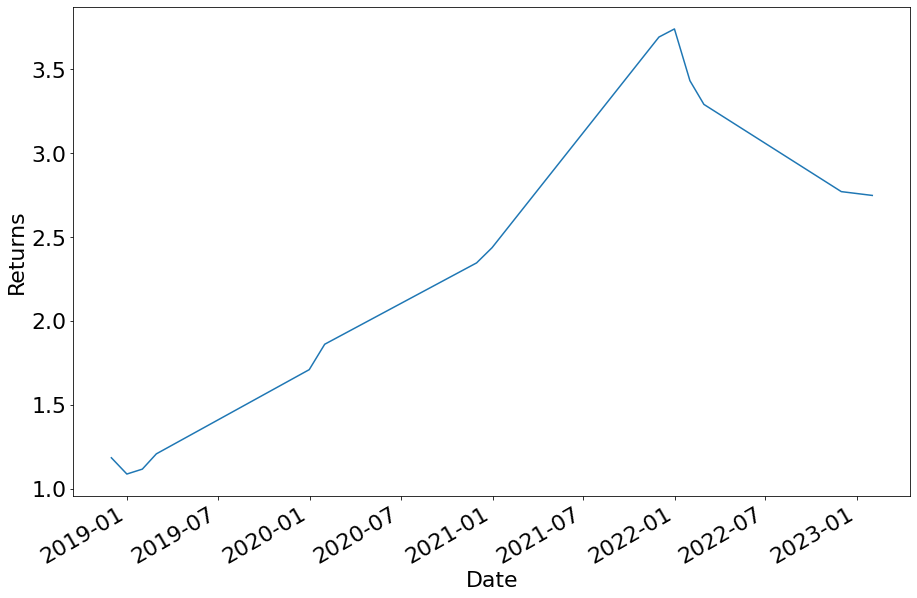

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size':22})
plt.ylabel("Returns")
total_returns.plot()